# Задача о такси в Нью-Йорке.  
От чего зависит стоимость поездки.  

## Условие задачи

Есть датасэт https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page о такси в Нью-Йорке.

Используйте данные за декабрь 2019 и январь 2020 года.

Как стоимость поездки скоррелирована с другими факторами? Как вы это можете объяснить?

Найдите аномальные поездки. Почему именно эти поездки вы считаете аномальными?

Постройте распределение по стоимости поездок. Проверьте гипотезу о том, что оно имеет нормальное распределение. Как вы можете это объяснить?

Из данных постройте модель, которая описывает тариф (т.е. стоимость поездки от других факторов).

Используя модель из пункта выше ответьте на вопрос: были ли в какие-то дни (или временные промежутки) скидки или акции? И если то были, то как вы можете это объяснить.

 
Нужно предоставить ссылку код (с комментариями внутри него). Можно использовать Google colab или github.



# Решение

## Загрузка данных

TLC Trip Record Data
The yellow and green taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

The For-Hire Vehicle (“FHV”) trip records include fields capturing the dispatching base license number and the pick-up date, time, and taxi zone location ID (shape file below). These records are generated from the FHV Trip Record submissions made by bases. Note: The TLC publishes base trip record data as submitted by the bases, and we cannot guarantee or confirm their accuracy or completeness. Therefore, this may not represent the total amount of trips dispatched by all TLC-licensed bases. The TLC performs routine reviews of the records and takes enforcement actions when necessary to ensure, to the extent possible, complete and accurate information.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import math
import time
%matplotlib inline

In [ ]:
yt_2019_12 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/citytaxi/data/2019-12/yellow_tripdata_2019-12.csv")
yt_2019_12.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
180026,2.0,2019-12-01 23:35:41,2019-12-01 23:56:07,1.0,4.31,1.0,N,146,223,2.0,17.0,0.5,0.5,0.00,0.0,0.3,18.30,0.0
4584015,2.0,2019-12-19 14:51:36,2019-12-19 15:15:52,3.0,2.74,1.0,N,211,233,1.0,16.0,0.0,0.5,3.86,0.0,0.3,23.16,2.5
1891857,2.0,2019-12-08 20:51:15,2019-12-08 21:00:47,2.0,1.60,1.0,N,238,263,2.0,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5
1245005,2.0,2019-12-06 11:30:41,2019-12-06 11:34:48,2.0,0.48,1.0,N,238,151,2.0,4.5,0.0,0.5,0.00,0.0,0.3,7.80,2.5
6832701,2.0,2019-12-31 22:49:58,2019-12-31 22:59:32,1.0,0.67,1.0,N,48,68,1.0,7.0,0.5,0.5,2.16,0.0,0.3,12.96,2.5


In [ ]:
gt_2019_12 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/citytaxi/data/2019-12/green_tripdata_2019-12.csv")
gt_2019_12.sample(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
3200,1.0,2019-12-01 11:53:50,2019-12-01 12:03:42,N,1.0,181,49,1.0,1.50,8.50,0.00,0.5,0.0,0.0,NaN,0.3,9.30,2.0,1.0,0.00
411767,NaN,2019-12-16 19:22:00,2019-12-16 19:46:00,NaN,NaN,241,213,NaN,6.17,23.09,2.75,0.0,0.0,0.0,NaN,0.3,26.14,NaN,NaN,NaN
11692,2.0,2019-12-02 09:09:09,2019-12-02 09:24:11,N,1.0,74,263,5.0,1.86,10.50,0.00,0.5,2.0,0.0,NaN,0.3,16.05,1.0,1.0,2.75
246225,2.0,2019-12-20 19:04:52,2019-12-20 19:10:21,N,1.0,75,74,1.0,1.32,6.00,1.00,0.5,1.4,0.0,NaN,0.3,9.20,1.0,1.0,0.00
35952,2.0,2019-12-04 11:31:37,2019-12-04 11:39:20,N,1.0,74,74,2.0,1.00,6.50,0.00,0.5,0.0,0.0,NaN,0.3,7.30,2.0,1.0,0.00


In [ ]:
fhvt_2019_12 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/citytaxi/data/2019-12/fhv_tripdata_2019-12.csv")
fhvt_2019_12.sample(5)

,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
627796,B01386,2019-12-11 12:47:00,2019-12-11 12:58:00,102,198,NaN
1491577,B00256,2019-12-26 12:29:46,2019-12-26 13:14:34,264,264,NaN
911394,B02550,2019-12-16 09:55:37,2019-12-16 10:02:53,264,95,NaN
920839,B02550,2019-12-16 11:04:12,2019-12-16 11:05:59,264,119,NaN
1420504,B00821,2019-12-24 19:17:53,2019-12-24 19:42:27,264,197,NaN


In [ ]:
fhvhvt_2019_12 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/citytaxi/data/2019-12/fhvhv_tripdata_2019-12.csv")
fhvhvt_2019_12.sample(5)

In [ ]:
yt_2020_01 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/citytaxi/data/2020-01/yellow_tripdata_2020-01.csv")
yt_2020_01.sample(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1943055,2.0,2020-01-11 10:15:45,2020-01-11 10:27:37,2.0,2.54,1.0,N,163,43,2.0,11.0,0.0,0.5,0.00,0.0,0.3,14.30,2.5
1844737,1.0,2020-01-10 20:06:48,2020-01-10 20:40:23,1.0,4.30,1.0,N,164,145,1.0,23.0,3.0,0.5,0.00,0.0,0.3,26.80,2.5
3149299,2.0,2020-01-16 22:05:04,2020-01-16 22:13:50,5.0,1.60,1.0,N,114,68,2.0,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5
1978012,2.0,2020-01-11 14:00:57,2020-01-11 14:19:21,5.0,2.86,1.0,N,68,148,1.0,13.5,0.0,0.5,3.36,0.0,0.3,20.16,2.5
5443446,1.0,2020-01-28 07:46:51,2020-01-28 08:07:34,2.0,3.90,1.0,N,236,230,2.0,16.0,2.5,0.5,0.00,0.0,0.3,19.30,2.5
5295115,2.0,2020-01-27 11:17:13,2020-01-27 11:24:27,1.0,0.78,1.0,N,238,239,1.0,6.5,0.0,0.5,1.70,0.0,0.3,11.50,2.5
3121162,2.0,2020-01-16 20:42:23,2020-01-16 20:45:03,1.0,0.58,1.0,N,249,249,1.0,4.0,0.5,0.5,1.56,0.0,0.3,9.36,2.5
4171255,2.0,2020-01-22 08:18:05,2020-01-22 08:25:10,1.0,1.67,1.0,N,48,142,1.0,7.5,0.0,0.5,2.16,0.0,0.3,12.96,2.5
2216052,2.0,2020-01-12 15:58:45,2020-01-12 16:15:01,1.0,2.15,1.0,N,263,238,1.0,12.0,0.0,0.5,2.30,0.0,0.3,17.60,2.5
2162151,2.0,2020-01-12 10:00:16,2020-01-12 10:06:11,2.0,1.62,1.0,N,166,238,1.0,7.5,0.0,0.5,2.00,0.0,0.3,10.30,0.0


In [ ]:
gt_2020_01 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/citytaxi/data/2020-01/green_tripdata_2020-01.csv")
gt_2020_01.sample(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
234617,2.0,2020-01-23 12:57:54,2020-01-23 13:01:25,N,1.0,75,74,1.0,0.69,4.50,0.00,0.5,0.0,0.00,NaN,0.3,5.30,2.0,1.0,0.0
89387,2.0,2020-01-09 20:57:29,2020-01-09 21:02:27,N,1.0,181,181,1.0,0.88,5.50,0.50,0.5,0.0,0.00,NaN,0.3,6.80,2.0,1.0,0.0
124073,2.0,2020-01-13 00:10:56,2020-01-13 00:22:19,N,1.0,82,157,1.0,2.45,10.00,0.50,0.5,0.0,0.00,NaN,0.3,11.30,2.0,1.0,0.0
410643,NaN,2020-01-18 17:09:00,2020-01-18 18:05:00,NaN,NaN,188,238,NaN,14.80,50.83,2.75,0.0,0.0,6.12,NaN,0.3,60.00,NaN,NaN,NaN
382744,NaN,2020-01-10 14:54:00,2020-01-10 15:56:00,NaN,NaN,33,39,NaN,8.50,30.41,0.00,0.0,0.0,0.00,NaN,0.3,30.71,NaN,NaN,NaN


In [ ]:
fhvt_2020_01 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/citytaxi/data/2020-01/fhv_tripdata_2020-01.csv")
fhvt_2020_01.sample(5)

,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
80489,B03160,2020-01-02 14:05:00,2020-01-02 14:48:00,10.0,193.0,NaN
1640559,B00789,2020-01-27 13:38:31,2020-01-27 14:45:59,264.0,264.0,NaN
1532072,B01445,2020-01-25 14:15:00,2020-01-25 15:06:00,227.0,21.0,NaN
1778280,B01455,2020-01-29 12:10:36,2020-01-29 12:28:04,264.0,223.0,NaN
456672,B01087,2020-01-08 20:29:28,2020-01-08 21:06:24,161.0,204.0,NaN


Очень большого объёма информация для гугл диска, пока не загружал. Если нет информации полезной по существу, то этими двумя таблицами пользоваться не буду (fhvhvt). ДОБАВЛЕНО: Также расходуется ОЗУ, загрузил только данные по жёлтому такси.

In [ ]:
fhvhvt_2020_01 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/citytaxi/data/2020-01/fhvhv_tripdata_2020-01.csv")
fhvhvt_2020_01.sample(5)

Изначально у нас четыре таблицы для каждого из двух месяцев: 

для 2019_12:

yt_2019_12  
gt_2019_12  
fhvt_2019_12  
fhvhvt_2019_12  

и для 2020_01:

yt_2020_01  
gt_2020_01  
fhvt_2020_01  
fhvhvt_2020_01

Посмотрим на примере 2019_12 месяца, какие колонки за что могут отвечать в каждой таблице, похожи ли колонки друг на друга. Выясним какие колонки коррелируют со стоимостью поездки.

### yt - жёлтое такси

In [ ]:
yt12_columns = yt_2019_12.columns
yt01_columns = yt_2020_01.columns

yt12_columns == yt01_columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
yt12_columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [ ]:
yt_2019_12.shape, yt_2020_01.shape

((6896317, 18), (6405008, 18))

Уже видно, что зафиксированых поездок примерно одинаково для декабря 2019 года и для января 2020 года. Опишем, что из себя представляют фичи.

Объединим две таблицы в одну. Введём дополнительный столбец, где укажем к какой таблице принадлежат исходные данные. Раз у нас только две таблицы, пусть для 2019_12 будет цифра '0', а для 2020_01 будет цифра '1'.

In [ ]:
'month' not in yt12_columns

True

In [ ]:
# добавляем в каждую из таблиц новый столбец с пометкой принадлежности одному
# из месяцев

yt_2019_12.insert(0, 'month', 0), yt_2020_01.insert(0, 'month', 1)

(None, None)

In [ ]:
type(yt_2019_12)

pandas.core.frame.DataFrame

In [ ]:
# объединяем таблицы

yt = pd.concat ([yt_2019_12, yt_2020_01], sort=False, axis=0)

# выводим на экран
yt.sample(7)

,month,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
4632188,0,2.0,2019-12-19 17:34:07,2019-12-19 17:43:57,1.0,1.07,1.0,N,143,238,1.0,8.0,1.0,0.5,2.46,0.0,0.3,14.76,2.5
5928388,1,2.0,2020-01-30 10:52:16,2020-01-30 11:11:02,1.0,2.58,1.0,N,158,114,1.0,14.0,0.0,0.5,1.50,0.0,0.3,18.80,2.5
1923561,0,1.0,2019-12-09 04:29:22,2019-12-09 04:50:33,0.0,9.60,1.0,N,161,138,1.0,28.0,3.0,0.5,6.35,0.0,0.3,38.15,2.5
4242786,0,1.0,2019-12-18 09:08:26,2019-12-18 09:27:45,2.0,2.40,1.0,N,239,163,1.0,14.0,2.5,0.5,3.45,0.0,0.3,20.75,2.5
2299046,0,2.0,2019-12-10 18:50:56,2019-12-10 19:17:41,1.0,1.96,1.0,N,230,234,1.0,16.5,1.0,0.5,4.16,0.0,0.3,24.96,2.5
6014077,0,2.0,2019-12-27 06:56:52,2019-12-27 07:00:44,1.0,0.79,1.0,N,13,231,1.0,5.0,0.0,0.5,1.66,0.0,0.3,9.96,2.5
3178739,0,2.0,2019-12-13 22:41:36,2019-12-13 23:14:35,1.0,6.24,1.0,N,162,66,1.0,23.5,0.5,0.5,5.46,0.0,0.3,32.76,2.5


In [ ]:
# del yt_2019_12['month']
# del yt_2020_01['month'] 

In [ ]:
yt_categorical_columns = [c for c in yt.columns if yt[c].dtype.name == 'object']
yt_numerical_columns   = [c for c in yt.columns if yt[c].dtype.name != 'object']
len(yt_categorical_columns), yt_categorical_columns, len(yt_numerical_columns), yt_numerical_columns

(3,
 ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag'],
 16,
 ['month',
  'VendorID',
  'passenger_count',
  'trip_distance',
  'RatecodeID',
  'PULocationID',
  'DOLocationID',
  'payment_type',
  'fare_amount',
  'extra',
  'mta_tax',
  'tip_amount',
  'tolls_amount',
  'improvement_surcharge',
  'total_amount',
  'congestion_surcharge'])

In [ ]:
yt[yt_categorical_columns].describe()


,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
count,13301325,13301325,13184866
unique,4312502,4317039,2
top,2020-01-09 16:53:00,2019-12-29 00:00:00,N
freq,21,85,13040007


У нас в датасете изначально три категориальных фичи:  

tpep_pickup_datetime

tpep_dropoff_datetime

store_and_fwd_flag



In [ ]:
yt[yt_numerical_columns].describe()

,month,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.330132e+07,1.318487e+07,1.318487e+07,1.330132e+07,1.318487e+07,1.330132e+07,1.330132e+07,1.318487e+07,1.330132e+07,1.330132e+07,1.330132e+07,1.330132e+07,1.330132e+07,1.330132e+07,1.330132e+07,1.330132e+07
mean,4.815316e-01,1.667980e+00,1.533787e+00,2.952341e+00,1.062944e+00,1.641724e+02,1.620543e+02,1.285196e+00,1.315874e+01,1.111859e+00,4.923682e-01,2.218002e+00,3.692072e-01,2.979863e-01,1.917047e+01,2.275463e+00
std,4.996588e-01,4.709382e-01,1.163589e+00,5.890652e+01,8.757305e-01,6.581286e+01,7.013568e+01,4.815006e-01,1.099645e+02,1.259975e+00,7.301767e-02,2.820425e+00,1.740590e+00,3.383608e-02,1.103017e+02,7.356288e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,-3.726453e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.472000e+03,-2.700000e+01,-5.000000e-01,-2.008000e+02,-4.050000e+01,-3.000000e-01,-1.472800e+03,-2.500000e+00
25%,0.000000e+00,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.250000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,0.000000e+00,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.475000e+01,2.500000e+00
75%,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.450000e+01,2.500000e+00,5.000000e-01,2.950000e+00,0.000000e+00,3.000000e-01,2.075000e+01,2.500000e+00
max,1.000000e+00,2.000000e+00,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,3.984684e+05,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,3.984712e+05,3.000000e+00


У нас в датасете 15 + 1 (мы ввели дополнительную колонку для удобства анализа) числовых признака:  

**month** - определяет в каком месяце произошло событие

**VendorID** - код, указывающий на поставщика, связанного с записью поездки

**passenger_count** - количество пассажиров в транспортном средстве (введенное водителем значение)  

**trip_distance** - расстояние поездки

**RatecodeID** - код тарифа (возможно классификация по классу поездки)

**PULocationID** - 

**DOLocationID** -  

**payment_type** -

**fare_amount** -

**extra** -

**mta_tax** -

**tip_amount** - тип

**tolls_amount** - сборы

**improvement_surcharge** - надбавка за улучшение

**total_amount** -

**congestion_surcharge** - доплата за пробку



### Разведочный анализ данных средствами pandas-profiling

Ссылка на то, как пользоваться pandas_profiling в  google collab
https://python.plainenglish.io/how-to-use-pandas-profiling-on-google-colab-e34f34ff1c9f

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 34.6 MB 27.1 MB/s
     |████████████████████████████████| 10.1 MB 7.6 MB/s 
     |████████████████████████████████| 636 kB 73.5 MB/s 
     |████████████████████████████████| 102 kB 76.1 MB/s 
     |████████████████████████████████| 675 kB 57.4 MB/s 
     |████████████████████████████████| 3.1 MB 45.0 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 812 kB 77.4 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248524 sha256=a97ba199fa72f035f1a99354003ba61c8f7e58a7db233f215e59db31924e0773
  Stored in directory: /tmp/pip-ephem-wheel-cache-_x_z6vwr/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ea417eed72dcf3fed3e92e41705b02b0e5ddb8dc257222efe026f26feb41876e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
yt_profile = ProfileReport(yt, title = 'Yellow Taxi', html = {'style':{'full_width':True}})

In [ ]:
 yt_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
yt_profile.to_file("/content/drive/My Drive/Colab Notebooks/citytaxi/profile report/yt.html")


Идея была классная, рабочая, но на ОЗУ не достаточно для обработки миллиона строк, значит по старинке вычислим корреляцию Пирсона, возможно выведем тепловую карту, чтобы найти скорреллированные факторы, особо для **стоимости поездки**. Значит смотрим следующий раздел.

### Как стоимость поездки скоррелирована с другими факторами? Как вы это можете объяснить?

Нас интересуют все численные фичи, среди которых есть и стоимость поездки.

**Начнём с построения pairplot.**

In [ ]:
sns.pairplot(yt[yt_numerical_columns])

Много строк. Не вариант.

**Ящик с усами.**

In [ ]:
for col in yt_numerical_columns:
  sns.boxplot(data = yt[yt_numerical_columns], orient="h")
  plt.title(col)
  plt.show()

Матрица корреляции. Тепловая карта.

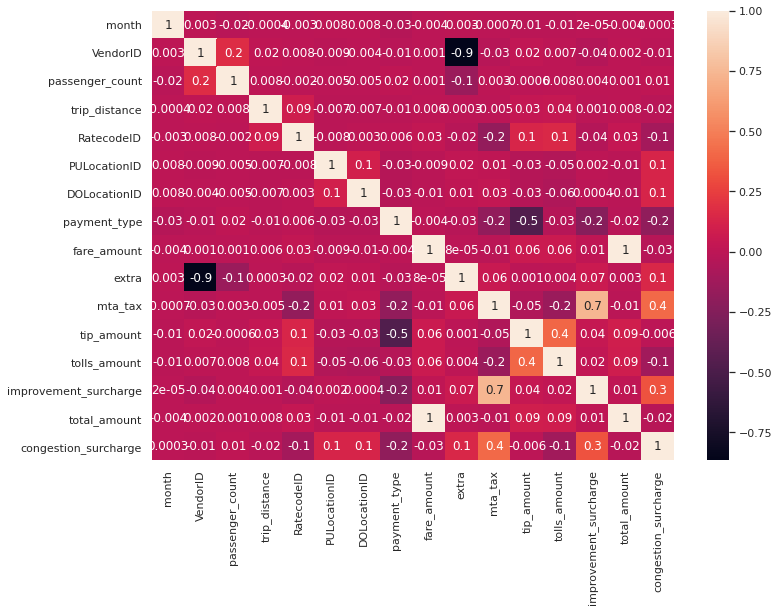

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(yt[yt_numerical_columns].corr(), annot = True, fmt='.1g')

Из тепловой карты видно, что не только не скоррелированы total_amount (стоимость поездки) с другими данными. Возможно это связано с тем, что у нас много выбросов в данных, которые стоит предобработать.  
Зато видно, что **скоррелированы mta_tax и improvement_surcharge. Это налог MTA и надбавка за улучшение.**
**Это не обработанный датасет, поэтому пока данным не доверять**
**После EDA повторить heatmap!!!** (ниже будет другая карта с отфильтрованными данными) и соотвественно по новому будет взгляд на вопрос **Как стоимость поездки скоррелирована с другими факторами? Как вы это можете объяснить?**

### Аномальные поездки.
(Пока это на этапе EDA (эксплоративного анализа данных) поэтому выбросы в глобальном понятии и будем считать аномальными поездками)

Жёлтое такси обычно вместитетльное, но не так, чтобы вместить более пяти человек, посмотрим уникальные значения количества пассажиров в транспортном средстве.

In [ ]:
yt.passenger_count.value_counts()

1.0    9330618
2.0    2022170
3.0     553241
5.0     470580
4.0     288401
6.0     280079
0.0     239633
7.0         74
9.0         35
8.0         35
Name: passenger_count, dtype: int64

Явно количество пассажиров в жёлтом такси не может быть больше, чем 5-6 человек, если, конечно, геолокация не показывает на Индию. :) Но вот явно очень мало строк со значением пассажиров [7, 8, 9]. Если не искать сверхзагадки, то эти строки можно спокойно дропать.

In [ ]:
yt[yt.passenger_count == 7]

,month,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1783,0,2.0,2019-12-01 00:48:45,2019-12-01 00:51:57,7.0,1.31,5.0,N,265,265,2.0,70.0,0.0,0.0,0.00,0.00,0.3,70.30,0.0
179088,0,2.0,2019-12-01 23:07:13,2019-12-01 23:51:27,7.0,31.77,5.0,N,10,265,1.0,75.0,0.0,0.5,20.48,6.12,0.3,102.40,0.0
187205,0,2.0,2019-12-02 00:48:25,2019-12-02 01:12:40,7.0,18.16,5.0,N,132,148,2.0,75.0,0.0,0.5,0.00,0.00,0.3,78.30,2.5
252751,0,2.0,2019-12-02 11:00:00,2019-12-02 11:47:17,7.0,12.50,5.0,N,237,228,1.0,70.0,0.0,0.5,0.00,0.00,0.3,73.30,2.5
262756,0,2.0,2019-12-02 12:17:44,2019-12-02 12:17:52,7.0,0.00,5.0,N,170,170,1.0,7.0,0.0,0.5,1.00,0.00,0.3,11.30,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821497,1,2.0,2020-01-24 23:49:37,2020-01-25 00:07:13,7.0,12.36,5.0,N,132,265,1.0,72.0,0.0,0.0,5.00,0.00,0.3,77.30,0.0
4979087,1,2.0,2020-01-25 17:33:57,2020-01-25 17:34:00,7.0,0.17,5.0,N,48,48,1.0,70.0,0.0,0.5,5.50,0.00,0.3,76.30,0.0
5139251,1,1.0,2020-01-26 13:16:40,2020-01-26 13:35:21,7.0,9.50,1.0,N,163,138,2.0,27.0,2.5,0.5,0.00,6.12,0.3,36.42,2.5
5183865,1,2.0,2020-01-26 17:36:12,2020-01-26 17:36:59,7.0,0.00,5.0,N,265,265,1.0,75.0,0.0,0.5,10.00,0.00,0.3,85.80,0.0


id : a unique identifier for each trip
vendor_id : a code indicating the provider associated with the trip record
passenger_count : the number of passengers in the vehicle (driver entered value)
Information about the Trip
pickup_longitude : date and time when the meter was engaged
pickup_latitude : date and time when the meter was disengaged
dropoff_longitude : the longitude where the meter was disengaged
dropoff_latitude : the latitude where the meter was disengaged
store_and_fwd_flag : This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
trip_duration : (target) duration of the trip in seconds


## Распределение по стоимости поездок.
(Проверьте гипотезу о том, что оно имеет нормальное распределение. Как вы можете это объяснить?)

Как я понял,  стоимость поездки это total_amount.

Построим ящик с усами.

In [ ]:
sns.boxplot(data = yt.total_amount, orient="h")

Построим распределение по месяца для стоимости поездки.

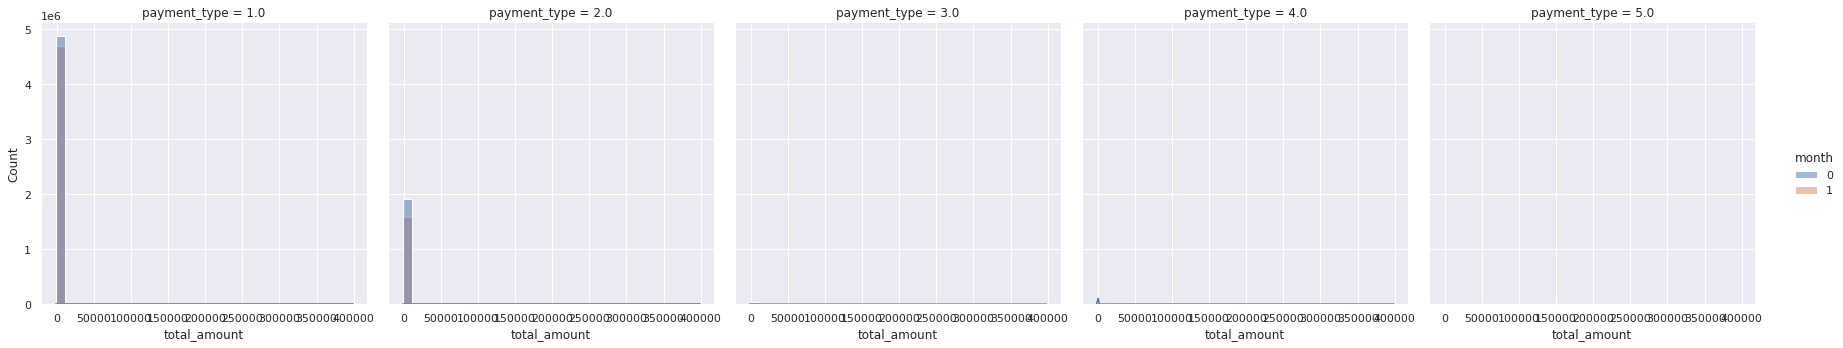

In [ ]:
sns.displot(data= yt,
            x='total_amount',
            hue='month',
            col='payment_type',
            bins=30,
            kde=True);

In [ ]:
min(yt.total_amount), max(yt.total_amount)

(-1472.8, 398471.2)

Действительно мы нашли очень большое аномальное значение. Даже есть отрицательные.   Да и графики показывают аномальные значения! Можно при возможности проверить, что аномальные значение встречаются для каждого типа payment. Явно или какой-то сбой, надо изучать аномальные значения или специально кто-то в каждый тип поездки внёс аномальные большие по стоимости поездки.


Следующий код показывает, что из датасета с более 13 млн строк (два месяца) выборка случайных значений выдает вполне разумные цифры. Следовательно надо поиграть фильтрами и убрать явно малое количество выбросовю как в отрицальную так и в сверхбольшую часть стоимости поездки.

In [ ]:
yt.total_amount.sample(5) 

4154800    76.56
2387550    19.12
245476     10.80
6310477     7.82
3065609     8.76
Name: total_amount, dtype: float64


Посмотрим количество отрицательных значений.



**Внимание!** С этого момента я решил сделать копию первоначального датасета, чтобы спокойно проводить EDA.

In [ ]:
yt_copy = yt.copy()

Нас не интересуют поездки, где либо заплатили отрицательную сумму или нулевую или очень большую. Я немного поиграл данными, больше чем нужно было по задаче. Но в конце сделаю фильтр по не аномальным данным и построю заново гистограмму распределений стоимости поездки.

**Поездки с нулевой стоимостью.**

In [ ]:
len(yt_copy[yt_copy.total_amount == 0 ])

3468

Да, нам нулевые поездки не интересны.

In [ ]:
yt_copy[yt_copy.total_amount == 0 ].sample(5)

,month,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
303735,1,1.0,2020-01-02 20:17:05,2020-01-02 20:17:05,1.0,0.00,5.0,Y,74,264,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5714151,1,1.0,2020-01-29 12:25:47,2020-01-29 13:08:35,1.0,0.00,1.0,N,69,97,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5074572,0,2.0,2019-12-21 10:04:39,2019-12-21 10:04:43,1.0,0.00,1.0,N,193,193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
853473,1,2.0,2020-01-05 23:44:03,2020-01-06 00:29:26,1.0,10.57,1.0,N,186,69,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5655299,0,1.0,2019-12-24 13:42:22,2019-12-24 13:42:22,1.0,0.00,5.0,N,90,264,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Интересно, ничего не заплатили, а  прокатали 1.6 км, в первой строчке.

In [ ]:
yt_taZero = yt_copy[yt_copy.total_amount == 0 ]
yt_taZero[yt_taZero.trip_distance!=0].sample(5)

,month,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
3912719,1,2.0,2020-01-20 20:51:30,2020-01-20 21:54:29,1.0,10.33,1.0,N,163,258,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6171115,1,2.0,2020-01-31 11:16:17,2020-01-31 12:15:50,1.0,36.03,4.0,N,161,48,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5241881,0,2.0,2019-12-22 00:23:00,2019-12-22 00:48:14,1.0,2.76,1.0,N,144,161,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1033732,1,2.0,2020-01-07 01:38:17,2020-01-07 01:40:38,1.0,0.22,1.0,N,100,230,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406065,1,1.0,2020-01-03 14:37:06,2020-01-03 14:37:09,2.0,1.20,2.0,N,161,161,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Среди 3468 поездок с нулевой стоимостью поездок оказалось 1370 с ненулевой дистанцией. Здесь обычно можно придумать,
#а сколько кружил таксист, ожидая клиента. Видимо включил систему, а потом сбросил стоимостью
len(yt_taZero[yt_taZero.trip_distance!=0])

1370

In [ ]:
len(yt_taZero[yt_taZero.trip_distance>=10]), len(yt_taZero[yt_taZero.trip_distance>=0])

(126, 3468)

In [ ]:
yt_taZero[yt_taZero.trip_distance<0][['total_amount', 'trip_distance']]

,total_amount,trip_distance


Ну хоть отрицательных расстояний в этой **выборке** нет!

In [ ]:
yt_taZero[yt_taZero.trip_distance>=50][['total_amount', 'trip_distance']]

,total_amount,trip_distance
3348894,0.0,53.67
4456961,0.0,52.17
5037009,0.0,51.38


Это же сколько надо катать машину до того, как посадить клиента!

In [ ]:
yt_taZero[yt_taZero.trip_distance<0][['total_amount', 'trip_distance']]

,total_amount,trip_distance


**Поездки с отрицательной стоимостью.**

In [ ]:
len(yt_copy[yt_copy.total_amount <= 0 ])

43797

Вот это сюрприз! Убедимся...

In [ ]:
yt_taLTZero = yt_copy[yt_copy.total_amount < 0 ]
yt_taLTZero[['total_amount', 'trip_distance']].sample(5)

,total_amount,trip_distance
6119309,-11.8,2.11
3821425,-20.3,0.00
5904,-16.3,0.03
3483945,-55.3,0.01
4874808,-8.3,0.75


Не будем анализировать эту выборку. Сразу кандидаты, чтобы дропнуть.

**Поездки с аномально большой стоимостью.**

In [ ]:
max(yt_copy[yt_copy.total_amount > 10000 ])

'trip_distance'

In [ ]:
yt_taGreatV = yt_copy[yt_copy.total_amount > 100 ]
yt_taGreatV[['total_amount', 'trip_distance']].sample(5)

,total_amount,trip_distance
6618578,152.30,34.01
186825,127.67,8.45
4510609,109.05,16.80
6357665,122.80,1.10
3231962,105.50,14.27


In [ ]:
len(yt_copy[yt_copy.total_amount > 100 ]), len(yt_copy[yt_copy.total_amount > 500 ])

(29354, 59)

In [ ]:
len(yt_copy[yt_copy.total_amount > 300 ])

697

Даже поездка больше 100 это уже копейки по сравнению с количеством строк. Но поездки за 500 и выше это точно кандидаты к удалению.

### Фильтруем поездки по стоимости и заново строим диаграмму распределения.

In [ ]:
yt_filtered_300 = yt_copy[(yt_copy['total_amount']<300) & (yt_copy['total_amount']>0) ]

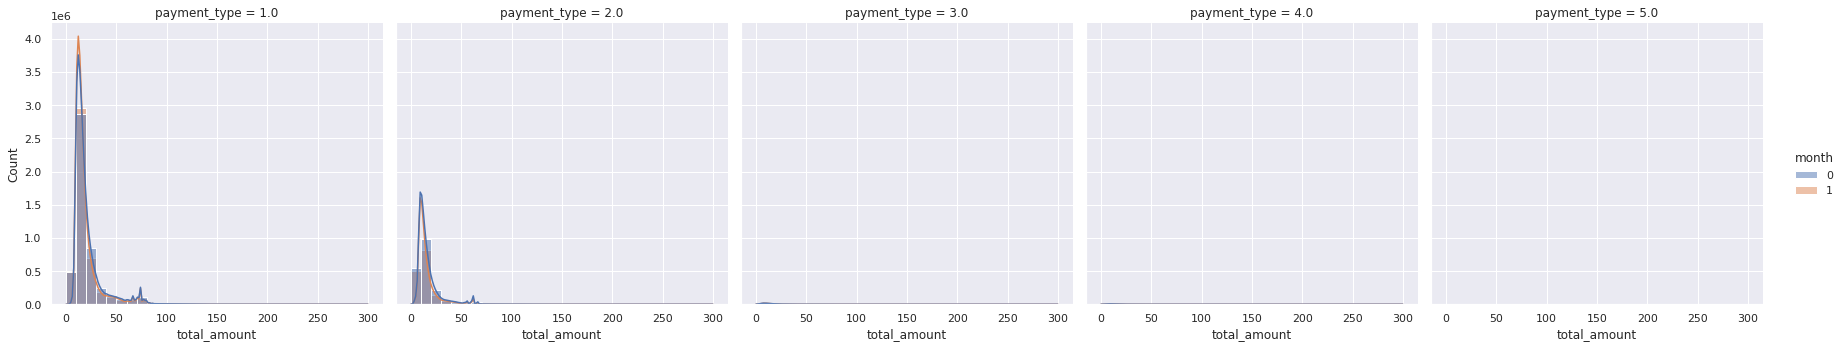

In [ ]:
sns.displot(data= yt_filtered_300,
            x='total_amount',
            hue='month',
            col='payment_type',
            bins=30,
            kde=True);

Можно уменьшить правый хвост до 100 у.е. Заодно будет интересно различить оба месяца на графиках.

In [ ]:
yt_filtered_100 = yt_copy[(yt_copy['total_amount']<100) & (yt_copy['total_amount']>0) ]

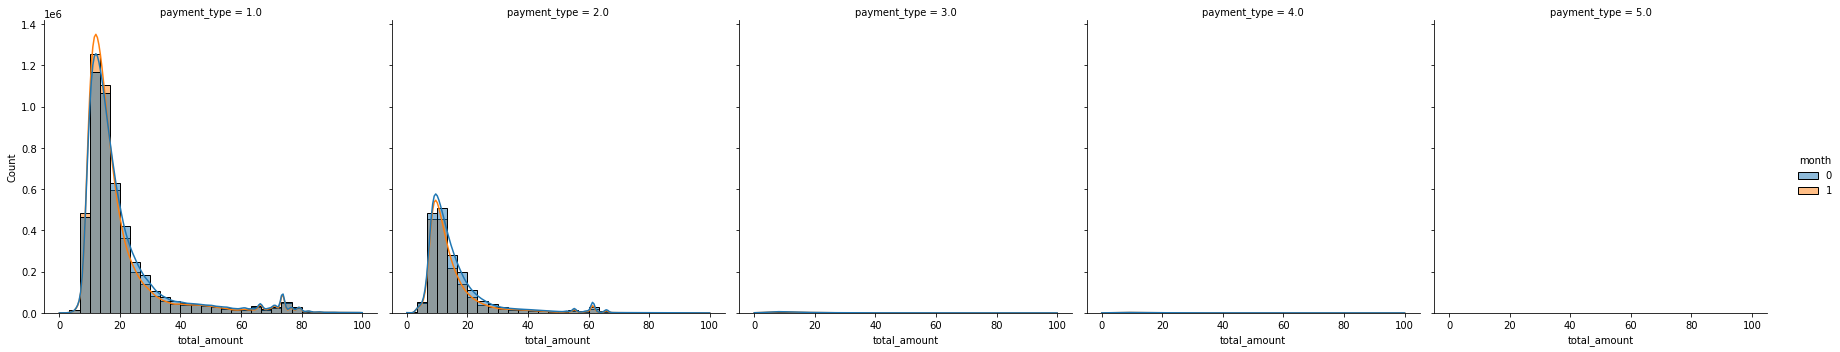

In [ ]:
sns.displot(data= yt_filtered_100,
            x='total_amount',
            hue='month',
            col='payment_type',
            bins=30,
            kde=True);

Пока строю модельку, вернусь к проверке гипотезы на нормальность чуть позже, на собеседовании или здесь появится ссылка на мой github с решёнными мной проектами, где анализирую и составляю гипотезы.  
Критерий Шапиро-Уилка и  
Критерий асимметрии и эксцесса   
Вот это с ходу вспоминается..

In [ ]:
yt_filtered_100.to_csv('/content/drive/My Drive/Colab Notebooks/citytaxi/data/yt_filtered_100.csv')

## LinearRegression

Проведём два эксперимента, когда используются все доступные числовые признаки и когда признаки, которые плохо скоррелированы с целевой переменной, убраны из рассмотрения.

В начале каждого эксперимента надо загрузить предварительно сохранённые данные.  
Да, ещё дополнительную колонку 'Unnamed: 0' удалить, которая нумерует строки датасета... в принципе полезная информация, reset_index надо было использовать при сохранении датасета, чтобы сейчас специально не удалять этот столбец.

In [ ]:
yt_filtered_100 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/citytaxi/data/yt_filtered_100.csv')
yt_filtered_100.sample(7)

,Unnamed: 0,month,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
11167667,4334153,1,1.0,2020-01-22 21:53:20,2020-01-22 22:03:47,1.0,1.60,1.0,N,162,141,1.0,8.50,3.00,0.5,2.45,0.00,0.3,14.75,2.5
8480172,1632179,1,1.0,2020-01-09 20:19:26,2020-01-09 20:42:08,1.0,5.60,1.0,N,163,87,1.0,20.50,3.00,0.5,4.85,0.00,0.3,29.15,2.5
4289326,4313428,0,1.0,2019-12-18 14:39:04,2019-12-18 14:48:38,1.0,0.70,1.0,N,249,234,2.0,7.50,2.50,0.5,0.00,0.00,0.3,10.80,2.5
6847750,6887391,0,NaN,2019-12-26 09:45:00,2019-12-26 10:02:00,NaN,2.92,NaN,NaN,75,152,NaN,21.95,2.75,0.5,0.00,0.00,0.3,25.50,0.0
10909926,4075166,1,2.0,2020-01-21 17:49:36,2020-01-21 17:57:29,1.0,1.61,1.0,N,162,263,1.0,7.50,1.00,0.5,2.95,0.00,0.3,14.75,2.5
10747176,3911508,1,2.0,2020-01-20 20:14:33,2020-01-20 20:39:50,2.0,16.64,2.0,N,132,107,1.0,52.00,0.00,0.5,8.52,6.12,0.3,69.94,2.5
11209468,4376200,1,1.0,2020-01-23 05:39:30,2020-01-23 05:44:52,1.0,1.00,1.0,N,186,68,1.0,6.00,3.00,0.5,1.95,0.00,0.3,11.75,2.5


### Эксперимент №1

Удалим ту самую колонку с индексацией строк.

In [ ]:
del yt_filtered_100['Unnamed: 0']

Удалим категориальные переменные.

In [ ]:
del yt_filtered_100['tpep_pickup_datetime']
del yt_filtered_100['tpep_dropoff_datetime']
del yt_filtered_100['store_and_fwd_flag']

Удалим пропуски.  

In [ ]:
yt_filtered_100.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yt_filtered_100.drop(columns=['total_amount']), yt_filtered_100.total_amount, test_size=0.25)

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('\nСтоимость поездки total_amount, реальная, предсказанная и отклонение:')
pd.DataFrame({'True': y_test.round(2), 'Predicted': y_pred.round(2), 'Deviation, %': (y_pred - y_test)/y_test}).round(2)


Стоимость поездки total_amount, реальная, предсказанная и отклонение:


,True,Predicted,"Deviation, %"
11558372,23.80,23.56,-0.01
7410123,9.30,9.35,0.00
9874996,11.16,11.22,0.00
3088603,17.15,17.04,-0.01
4441748,14.30,14.20,-0.01
...,...,...,...
3425253,11.16,11.07,-0.01
3962740,12.80,12.85,0.00
6760594,11.75,11.64,-0.01
8478183,13.39,13.30,-0.01


In [ ]:
print('\nМетрики модели:\n')
print('MSE:', mean_squared_error(y_test, y_pred).round(4))
print('MAE:', mean_absolute_error(y_test, y_pred).round(4))


Метрики модели:

MSE: 0.0796
MAE: 0.1672


Предполагаю, что здесь не совсем верная игра. Есть параметр 'fare_amount', который коррелирует с максимальным коэффициентом, единичка (**это будет показано в коде ниже**). Уберём этот столбец из рассмотрения, проведём эксперимент 1а сравним метрики модели и возможно это и будет некий baseline и валидная модель. 

In [ ]:
yt_filtered_100.sample(7)

,month,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
12102761,1,1.0,1.0,0.8,1.0,229,163,1.0,7.0,2.5,0.5,0.00,0.0,0.3,10.30,2.5
11331476,1,1.0,1.0,1.2,1.0,236,237,1.0,8.5,3.5,0.5,2.00,0.0,0.3,14.80,2.5
2847142,0,1.0,1.0,0.7,1.0,68,68,1.0,4.5,3.0,0.5,1.00,0.0,0.3,9.30,2.5
3492136,0,2.0,1.0,3.6,1.0,232,48,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5
5806427,0,2.0,1.0,1.7,1.0,48,162,1.0,9.5,0.5,0.5,2.66,0.0,0.3,15.96,2.5
232385,0,1.0,1.0,0.2,1.0,48,48,2.0,3.5,2.5,0.5,0.00,0.0,0.3,6.80,2.5
5920983,0,1.0,2.0,0.4,1.0,161,230,1.0,5.5,3.5,0.5,2.45,0.0,0.3,12.25,2.5


#### Эксперимент №1а

Основная 'магия':

In [ ]:
del yt_filtered_100['fare_amount']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yt_filtered_100.drop(columns=['total_amount']), yt_filtered_100.total_amount, test_size=0.25)

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('\nСтоимость поездки total_amount, реальная, предсказанная и отклонение:')
pd.DataFrame({'True': y_test.round(2), 'Predicted': y_pred.round(2), 'Deviation, %': (y_pred - y_test)/y_test}).round(2)


Стоимость поездки total_amount, реальная, предсказанная и отклонение:


,True,Predicted,"Deviation, %"
6935494,10.80,12.52,0.16
12710046,17.30,17.50,0.01
8029545,76.10,61.81,-0.19
2288393,10.30,11.95,0.16
11413810,20.16,21.59,0.07
...,...,...,...
2628415,43.29,43.75,0.01
9039729,11.30,11.58,0.03
4677681,14.75,16.59,0.13
11666446,8.80,8.92,0.01


In [ ]:
print('\nМетрики модели:\n')
print('MSE:', mean_squared_error(y_test, y_pred).round(4))
print('MAE:', mean_absolute_error(y_test, y_pred).round(4))


Метрики модели:

MSE: 586.7652
MAE: 2.2098


Вот, теперь появилось поле для деятельности...  

### Эксперимент №2.

Помеченный комментарием код уже выполнялся.

In [ ]:
# del yt_filtered_100['tpep_pickup_datetime']
# del yt_filtered_100['tpep_dropoff_datetime']
# del yt_filtered_100['store_and_fwd_flag']

In [ ]:
# yt_filtered_100.dropna(inplace=True)

Мы убрали в эксперимента 1а переменную с коэффициентом корреляции 1 по отношению к целевой переменной. Теперь уберём колонку 'month' и колонки с минимальной корреляцией (**расчёт тепловой матрицы представлен ниже по коду**)

In [ ]:
yt_filtered_100

,month,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,1.0,4.20,1.0,142,116,2.0,3.0,0.5,0.00,0.0,0.3,18.30,2.5
1,0,1.0,1.0,0.00,1.0,145,145,2.0,0.5,0.5,0.00,0.0,0.3,3.80,0.0
2,0,1.0,1.0,0.00,1.0,145,145,2.0,0.5,0.5,0.00,0.0,0.3,3.80,0.0
3,0,1.0,2.0,9.40,1.0,138,25,1.0,0.5,0.5,10.00,0.0,0.3,39.80,0.0
4,0,1.0,2.0,1.60,1.0,161,237,2.0,3.0,0.5,0.00,0.0,0.3,12.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13162729,1,2.0,1.0,4.11,1.0,48,75,1.0,0.5,0.5,4.26,0.0,0.3,25.56,2.5
13162730,1,2.0,1.0,2.10,1.0,163,246,1.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
13162731,1,2.0,1.0,2.13,1.0,164,79,1.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5
13162732,1,2.0,1.0,2.55,1.0,79,68,1.0,0.5,0.5,3.26,0.0,0.3,19.56,2.5


In [ ]:
del yt_filtered_100['month']
del yt_filtered_100['VendorID']
del yt_filtered_100['PULocationID']
del yt_filtered_100['DOLocationID']
del yt_filtered_100['extra']
# del yt_filtered_100['fare_amount']

In [ ]:
# del yt_filtered_100['Unnamed: 0']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(yt_filtered_100.drop(columns=['total_amount']), yt_filtered_100.total_amount, test_size=0.25)

In [ ]:
StSc = StandardScaler()
X_train = StSc.fit_transform(X_train)
X_test = StSc.transform(X_test)

In [ ]:
yt_filtered_100.sample(2)

,passenger_count,trip_distance,RatecodeID,payment_type,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
5117495,1.0,0.60,1.0,2.0,0.5,0.00,0.0,0.3,7.30,2.5
907997,1.0,1.51,1.0,1.0,0.5,2.66,0.0,0.3,15.96,2.5


In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('\nСтоимость поездки total_amount, реальная, предсказанная и отклонение:')
pd.DataFrame({'True': y_test.round(2), 'Predicted': y_pred.round(2), 'Deviation, %': (y_pred - y_test)/y_test}).round(2)


Стоимость поездки total_amount, реальная, предсказанная и отклонение:


,True,Predicted,"Deviation, %"
10729809,77.04,63.35,-0.18
8752328,16.30,14.66,-0.10
6474019,17.80,12.45,-0.30
10289698,11.76,14.62,0.24
2738014,12.30,13.76,0.12
...,...,...,...
3569510,9.36,13.28,0.42
8183738,25.30,16.00,-0.37
5154782,8.80,11.43,0.30
2398111,36.96,30.01,-0.19


In [ ]:
print('\nМетрики модели:\n')
print('MSE:', mean_squared_error(y_test, y_pred).round(4))
print('MAE:', mean_absolute_error(y_test, y_pred).round(4))


Метрики модели:

MSE: 42.0488
MAE: 4.0737


Вернём все столбцы в следующем эксперименте №2б (загрузим обновлённый датасет заново) и удалим теже категориальные столбцы, что в ранних экспериментах, но удалим в отличие от эксперимента №2а только столбцы 'month' и столбец 'RatecodeID'.



#### Эксперимент №2б

In [ ]:
yt_filtered_100 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/citytaxi/data/yt_filtered_100.csv')
yt_filtered_100.sample(7)

,Unnamed: 0,month,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2939796,2956570,0,2.0,2019-12-13 05:00:01,2019-12-13 05:07:41,1.0,2.44,1.0,N,164,239,2.0,9.5,0.5,0.5,0.00,0.0,0.3,13.30,2.5
2656128,2671063,0,2.0,2019-12-12 05:57:54,2019-12-12 06:00:30,1.0,0.80,1.0,N,48,230,1.0,4.5,0.5,0.5,2.08,0.0,0.3,10.38,2.5
5381087,5412015,0,1.0,2019-12-22 23:07:35,2019-12-22 23:16:58,1.0,2.70,1.0,N,164,236,1.0,10.0,3.0,0.5,1.50,0.0,0.3,15.30,2.5
1173386,1180063,0,2.0,2019-12-06 06:00:46,2019-12-06 06:02:02,1.0,0.10,1.0,N,164,164,2.0,3.0,0.0,0.5,0.00,0.0,0.3,6.30,2.5
1177773,1184480,0,2.0,2019-12-06 06:41:42,2019-12-06 06:48:42,2.0,1.68,1.0,N,162,141,1.0,7.5,0.0,0.5,2.16,0.0,0.3,12.96,2.5
2168184,2180407,0,1.0,2019-12-10 08:35:59,2019-12-10 09:30:50,1.0,0.00,1.0,Y,122,80,1.0,34.2,0.0,0.5,0.00,0.0,0.3,35.00,0.0
7135529,280734,1,2.0,2020-01-02 18:11:43,2020-01-02 18:31:48,1.0,5.62,1.0,N,13,234,1.0,19.5,1.0,0.5,4.76,0.0,0.3,28.56,2.5


In [ ]:
del yt_filtered_100['Unnamed: 0']

In [ ]:
del yt_filtered_100['tpep_pickup_datetime']
del yt_filtered_100['tpep_dropoff_datetime']
del yt_filtered_100['store_and_fwd_flag']

In [ ]:
del yt_filtered_100['month']
del yt_filtered_100['RatecodeID']

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('\nСтоимость поездки total_amount, реальная, предсказанная и отклонение:')
pd.DataFrame({'True': y_test.round(2), 'Predicted': y_pred.round(2), 'Deviation, %': (y_pred - y_test)/y_test}).round(2)


Стоимость поездки total_amount, реальная, предсказанная и отклонение:


,True,Predicted,"Deviation, %"
10729809,77.04,63.35,-0.18
8752328,16.30,14.66,-0.10
6474019,17.80,12.45,-0.30
10289698,11.76,14.62,0.24
2738014,12.30,13.76,0.12
...,...,...,...
3569510,9.36,13.28,0.42
8183738,25.30,16.00,-0.37
5154782,8.80,11.43,0.30
2398111,36.96,30.01,-0.19


In [ ]:
print('\nМетрики модели:\n')
print('MSE:', mean_squared_error(y_test, y_pred).round(4))
print('MAE:', mean_absolute_error(y_test, y_pred).round(4))


Метрики модели:

MSE: 42.0488
MAE: 4.0737


## Модель (Random Forest)  
пока без ансамблирования, разбивки на фолды GridSearch
и всяких AutoML-методов.. (первое частенько использую, с AutoML-подходами ознакомился недавно).

(Модель не сработала, но здесь есть heatmap с обновлёнными данными)

In [ ]:
yt_filtered_100 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/citytaxi/data/yt_filtered_100.csv')

In [ ]:
yt_filtered_100

,month,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,2019-12-01 00:26:58,2019-12-01 00:41:45,1.0,4.20,1.0,N,142,116,2.0,14.50,3.00,0.5,0.0,0.00,0.3,18.30,2.5
1,0,1.0,2019-12-01 00:12:08,2019-12-01 00:12:14,1.0,0.00,1.0,N,145,145,2.0,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0
2,0,1.0,2019-12-01 00:25:53,2019-12-01 00:26:04,1.0,0.00,1.0,N,145,145,2.0,2.50,0.50,0.5,0.0,0.00,0.3,3.80,0.0
3,0,1.0,2019-12-01 00:12:03,2019-12-01 00:33:19,2.0,9.40,1.0,N,138,25,1.0,28.50,0.50,0.5,10.0,0.00,0.3,39.80,0.0
4,0,1.0,2019-12-01 00:05:27,2019-12-01 00:16:32,2.0,1.60,1.0,N,161,237,2.0,9.00,3.00,0.5,0.0,0.00,0.3,12.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,1,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,1,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,1,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,1,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0


Дропнем все NaN значения и категориальные признаки, пока не будем проводить кодировку категориальных признаков.  
Со временем стоит сделать кодировку по фиче 'payment_type' (если не читаете это сообщение, значит закодировал).
Кстати в другой задаче, я работал и с Geopy и timestamp использовал и 
кодировал переменные, вот к примеру также в задаче о такси 
https://github.com/dizel0110/netology_dvp_diploma_project/blob/master/dvp%20diploma%20project.ipynb

'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag'

In [ ]:
del yt_filtered_100['tpep_pickup_datetime']
del yt_filtered_100['tpep_dropoff_datetime']
del yt_filtered_100['store_and_fwd_flag']

In [ ]:
yt_filtered_100.dropna(inplace=True)


In [ ]:
yt_filtered_100.describe()

,month,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07
mean,4.809464e-01,1.666837e+00,1.533975e+00,2.865127e+00,1.056070e+00,1.644364e+02,1.623951e+02,1.279235e+00,1.282746e+01,1.103460e+00,4.975212e-01,2.209982e+00,3.341306e-01,2.998839e-01,1.882171e+01,2.313213e+00
std,4.996368e-01,4.713442e-01,1.164183e+00,6.438596e+00,8.443987e-01,6.567049e+01,6.984020e+01,4.674929e-01,1.087095e+01,1.249113e+00,3.644346e-02,2.562180e+00,1.485486e+00,5.899821e-03,1.342183e+01,6.573239e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,-2.301000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.000000e-01,-2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,0.000000e+00,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,0.000000e+00,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.475000e+01,2.500000e+00
75%,1.000000e+00,2.000000e+00,2.000000e+00,2.920000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.450000e+01,2.500000e+00,5.000000e-01,2.960000e+00,0.000000e+00,3.000000e-01,2.030000e+01,2.500000e+00
max,1.000000e+00,2.000000e+00,9.000000e+00,1.913018e+04,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,9.950000e+01,3.375000e+01,3.080000e+01,9.700000e+01,9.050000e+01,3.000000e-01,9.999000e+01,3.000000e+00


И самое время повторить heatmap!

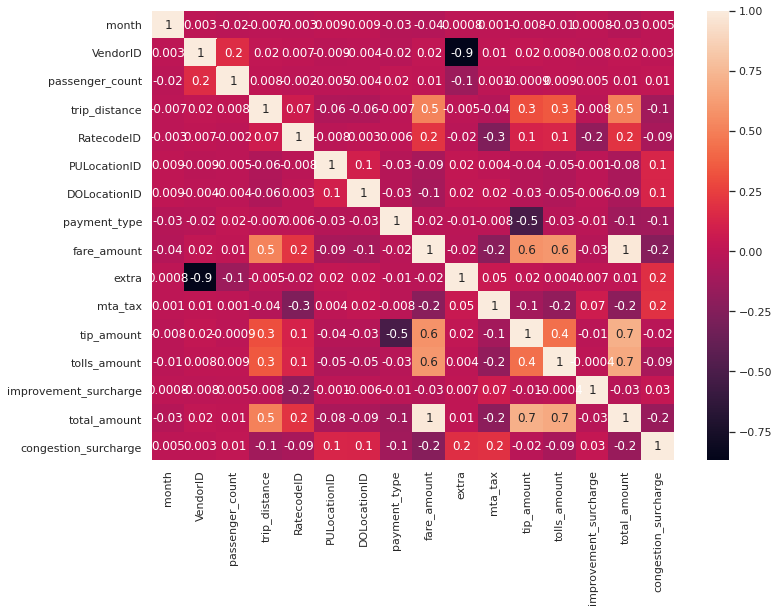

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(yt_filtered_100.corr(), annot = True, fmt='.1g')

**Эврика**, наконец-то можно говорить с чем коррелирует 'total_amount' и ответить на **Как стоимость поездки скоррелирована с другими факторами? Как вы это можете объяснить?**  


Во-первых вместо как можно сказать с какими фичами коррелирует 'целевая':  
'RatecodeID' с коэффициентом 0.2  **слабая** зависимость.  
'trip_distance' с коэффициентом 0.5 (!!! EDA делает чудеса)  **средняя**  
'tip_amount' c коэффициентом 0.7 **сильная**  
'tolls_amount' с коэффициентом 0.7 **сильная**  
'fare_amount' с коэффициентом 1 (видимо округлено до 1)  
(хотя и не удивлюсь, что в обработанных данных заиграло так, что целевой параметер от фичи 'fare_amount' выражается через константу,
поэтому и 1)  

С amount-подобными фичами понятно, это уже к тому, как стоимость 'рассчитывается'...  
А вот с дистанцией всё хорошо! Единственное почему не близко к 1?  Потому что петляет наш таксист по извилистым дорогам и не понятно, как считается дистанция (не правильное предположение), а вот более достоверное, возможно надо разделить по **'payment_type'** и внутри каждой из подгрупп в среднем думаю этот коэффициент корреляции подрастёт..

In [ ]:
yt_filtered_100 = yt_filtered_100.sample(frac=.01)

In [ ]:
del yt_filtered_100['tpep_pickup_datetime']
del yt_filtered_100['tpep_dropoff_datetime']
del yt_filtered_100['store_and_fwd_flag']

In [ ]:
del yt_filtered_100['month']
del yt_filtered_100['VendorID']
del yt_filtered_100['PULocationID']
del yt_filtered_100['DOLocationID']
del yt_filtered_100['extra']
del yt_filtered_100['fare_amount']

 ['month',
  'VendorID',
  'passenger_count',
  'trip_distance',
  'RatecodeID',
  'PULocationID',
  'DOLocationID',
  'payment_type',
  'fare_amount',
  'extra',
  'mta_tax',
  'tip_amount',
  'tolls_amount',
  'improvement_surcharge',
  'total_amount',
  'congestion_surcharge']

In [ ]:
X = yt_filtered_100[yt_filtered_100.columns.difference(['total_amount'])] 
y = yt_filtered_100['total_amount']

Выделим из датасета тренировочные и тестовые данные. Тренировочные данные будем использовать для обучения модели. Тестовые данные будем использовать для подсчета качества модели.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

In [ ]:
headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Посчитаем качество модели - classification report:



In [ ]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)

Оптимизирую модель, скалирую значения.

In [ ]:
yt_filtered_100 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/citytaxi/data/yt_filtered_100.csv')

In [ ]:
del yt_filtered_100['tpep_pickup_datetime']
del yt_filtered_100['tpep_dropoff_datetime']
del yt_filtered_100['store_and_fwd_flag']

In [ ]:
yt_filtered_100.dropna(inplace=True)

In [ ]:
# Нормализуем данные, выделим целевое значение
from sklearn import preprocessing

X = yt_filtered_100.drop(['total_amount'], axis = 1)
y = yt_filtered_100['total_amount']

#Задаем максимум и минимум новой нормализованной выборки через feature_range
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# Запоминаем названия столбцов
headers = list(X.columns.values)

# Трансформируем регрессоры, масштабируя каждую переменную к указанному диапазону
# Получаем построчный numpy array
np_scaled = min_max_scaler.fit_transform(X)

# Преобразуем в DataFrame
X_norm = pd.DataFrame(np_scaled)

# Восстанавливаем названия столбцов
X_norm.columns = headers
X_norm.head()

,Unnamed: 0,month,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
0,0.000000e+00,0.0,0.0,0.111111,0.001421,0.0,0.534091,0.435606,0.25,0.152542,0.493827,0.016234,0.000000,0.0,1.0,0.833333
1,1.460857e-07,0.0,0.0,0.111111,0.001201,0.0,0.545455,0.545455,0.25,0.032901,0.452675,0.016234,0.000000,0.0,1.0,0.000000
2,2.921714e-07,0.0,0.0,0.111111,0.001201,0.0,0.545455,0.545455,0.25,0.032901,0.452675,0.016234,0.000000,0.0,1.0,0.000000
3,4.382570e-07,0.0,0.0,0.222222,0.001692,0.0,0.518939,0.090909,0.00,0.292124,0.452675,0.016234,0.103093,0.0,1.0,0.000000
4,5.843427e-07,0.0,0.0,0.222222,0.001285,0.0,0.606061,0.893939,0.25,0.097707,0.493827,0.016234,0.000000,0.0,1.0,0.833333


In [ ]:
del X_norm['Unnamed: 0']
X_norm

,month,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge
0,0.0,0.0,0.111111,0.001421,0.0,0.534091,0.435606,0.25,0.152542,0.493827,0.016234,0.000000,0.0,1.0,0.833333
1,0.0,0.0,0.111111,0.001201,0.0,0.545455,0.545455,0.25,0.032901,0.452675,0.016234,0.000000,0.0,1.0,0.000000
2,0.0,0.0,0.111111,0.001201,0.0,0.545455,0.545455,0.25,0.032901,0.452675,0.016234,0.000000,0.0,1.0,0.000000
3,0.0,0.0,0.222222,0.001692,0.0,0.518939,0.090909,0.00,0.292124,0.452675,0.016234,0.103093,0.0,1.0,0.000000
4,0.0,0.0,0.222222,0.001285,0.0,0.606061,0.893939,0.25,0.097707,0.493827,0.016234,0.000000,0.0,1.0,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13111777,1.0,1.0,0.111111,0.001416,0.0,0.178030,0.280303,0.00,0.182453,0.452675,0.016234,0.043918,0.0,1.0,0.833333
13111778,1.0,1.0,0.111111,0.001311,0.0,0.613636,0.928030,0.00,0.117647,0.452675,0.016234,0.030515,0.0,1.0,0.833333
13111779,1.0,1.0,0.111111,0.001313,0.0,0.617424,0.295455,0.00,0.137587,0.452675,0.016234,0.034639,0.0,1.0,0.833333
13111780,1.0,1.0,0.111111,0.001335,0.0,0.295455,0.253788,0.00,0.132602,0.452675,0.016234,0.033608,0.0,1.0,0.833333


In [ ]:
y.value_counts()

9.80     248455
10.30    248373
10.80    243197
9.30     242381
11.30    234659
          ...  
67.74         1
94.17         1
94.58         1
94.67         1
74.95         1
Name: total_amount, Length: 8953, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

ValueError: ignored

In [ ]:
headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

### Что-то ещё.

In [ ]:
yt_filtered_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13111782 entries, 0 to 13162733
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   month                  int64  
 2   VendorID               float64
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   PULocationID           int64  
 7   DOLocationID           int64  
 8   payment_type           float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  congestion_surcharge   float64
dtypes: float64(13), int64(4)
memory usage: 1.8 GB


In [ ]:
yt_filtered_100.describe()

,Unnamed: 0,month,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07,1.311178e+07
mean,3.300935e+06,4.809464e-01,1.666837e+00,1.533975e+00,2.865127e+00,1.056070e+00,1.644364e+02,1.623951e+02,1.279235e+00,1.282746e+01,1.103460e+00,4.975212e-01,2.209982e+00,3.341306e-01,2.998839e-01,1.882171e+01,2.313213e+00
std,1.911384e+06,4.996368e-01,4.713442e-01,1.164183e+00,6.438596e+00,8.443987e-01,6.567049e+01,6.984020e+01,4.674929e-01,1.087095e+01,1.249113e+00,3.644346e-02,2.562180e+00,1.485486e+00,5.899821e-03,1.342183e+01,6.573239e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-2.301000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.000000e-01,-2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,1.647885e+06,0.000000e+00,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,3.296052e+06,0.000000e+00,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.475000e+01,2.500000e+00
75%,4.944089e+06,1.000000e+00,2.000000e+00,2.000000e+00,2.920000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.450000e+01,2.500000e+00,5.000000e-01,2.960000e+00,0.000000e+00,3.000000e-01,2.030000e+01,2.500000e+00
max,6.845298e+06,1.000000e+00,2.000000e+00,9.000000e+00,1.913018e+04,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,9.950000e+01,3.375000e+01,3.080000e+01,9.700000e+01,9.050000e+01,3.000000e-01,9.999000e+01,3.000000e+00
